In [203]:
%matplotlib notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import numpy as np
import math as m
import scipy.integrate as integrate
from scipy.integrate import quad
from numpy import* 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
from matplotlib import ticker
#import cmocean

In [226]:
#This function calculates the Fourier Coefficients Cn
def FourierCoefficient(n, L):
    #print(n)
    # we define the integrand of Cn as: V0(x)*sin(n*pi*x/L)
    integrand = lambda x: (1-((x/L)-0.5)**4)*(sin((n*pi*x)/L))
    #integrand = lambda x: ((sin((pi*x)/L)*(sin((n*pi*x)/L))))
    cn = (2/L)*sinh(n*pi)*quad(integrand, 0, L)[0]
   # print(cn)   
    return cn

In [238]:
#This function calculates the Potential V(x,y) as a Fourier Sine Series
def potential_series(L, N, nmax):
    potential = np.zeros((N,N))
    x = linspace(0, L, num=N, endpoint=True)
    y = linspace(0, L, num=N, endpoint=True)
    cn = 1
    temp = 0

    for i in range(N):
        for j in range(N):
            for n in range(1, nmax):
                cn = FourierCoefficient(n, L)
                potential[i,j] =  cn*sin((n*pi*x[i])/L)*sinh((n*pi*y[j])/L)+temp

                temp = potential[i,j]
    return potential


<IPython.core.display.Javascript object>


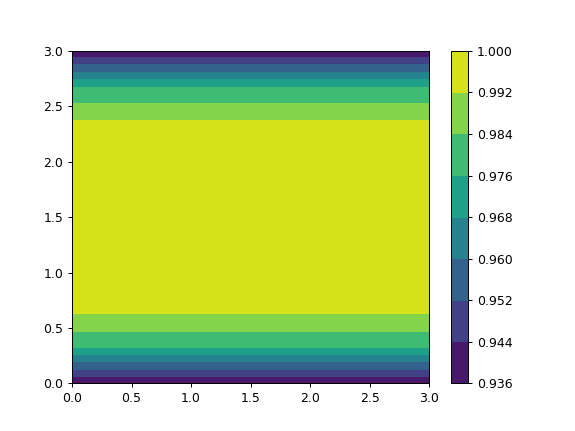

<IPython.core.display.Javascript object>


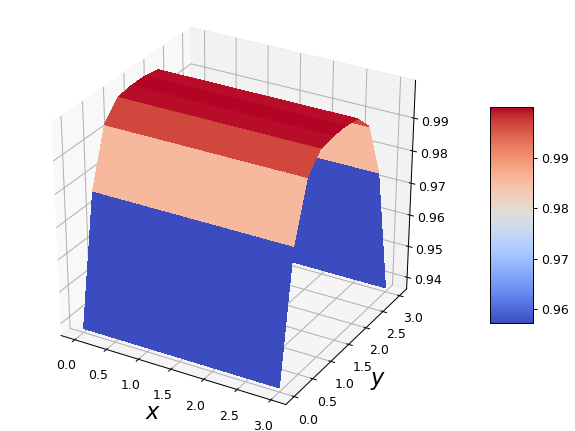

In [239]:
################################################################################################################################

### Plotting of V0 and comparison of V0 at y=L with the numerical solution              

################################################################################################################################
L = 3
N = 10
nmax = 10

V0 = np.zeros((N,N))
x = linspace(0, L, num=N, endpoint=True)

for i in range(N):
    V0[i] = (1-((x[i]/L)-0.5)**4)
       
potential = potential_series(L, N, nmax)
             
fig = plt.figure()
X,Y = np.meshgrid(np.linspace(0,L,N), np.linspace(0,L,N))
plt.contourf(X, Y, V0)
plt.colorbar()





fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, V0, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<IPython.core.display.Javascript object>


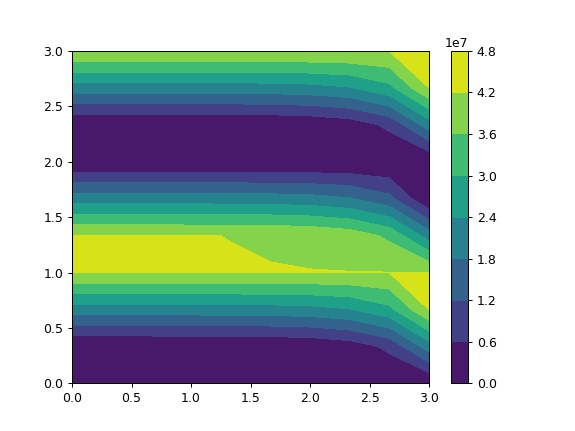

<IPython.core.display.Javascript object>


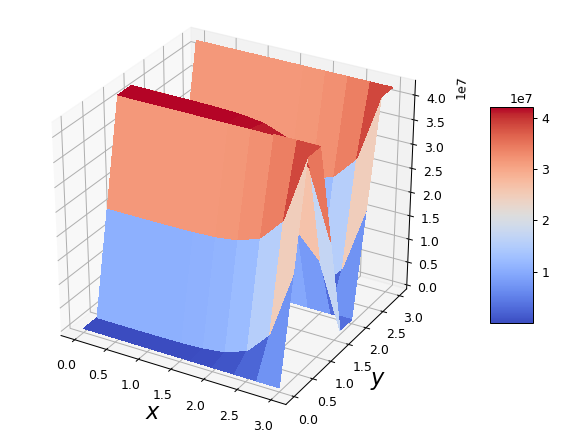

In [240]:
#Input arguments
L = 3
N = 10
nmax = 5

potential = potential_series(L, N, nmax)
fig = plt.figure()
X,Y = np.meshgrid(np.linspace(0,L,N), np.linspace(0,L,N))
plt.contourf(X, Y, potential)
plt.colorbar()





fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, potential, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()